#Import all required libraries for reading data, analysing and visualizing data


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler


Dataset

In [171]:
df = pd.read_csv('/content/Dataset.csv')

In [197]:
df

,Watch,Color,Display Size,Weight,Compatible Device,Heart Rate Checker,GPS,Step Counter,Battery,Water Resistance Level,Price
0,0,3,1.43,85,2,1,0,1,415,20,69.99
1,0,6,1.34,75,2,0,1,1,340,10,84.99
2,0,0,1.34,75,2,0,1,1,340,10,90.55
3,0,6,1.34,75,2,0,1,1,340,10,84.99
4,0,3,1.43,85,2,1,0,1,415,20,69.99
...,...,...,...,...,...,...,...,...,...,...,...
314,30,8,1.35,85,0,0,1,1,270,10,110.99
315,30,0,1.10,55,0,1,0,1,250,0,129.99
316,30,0,1.10,55,0,1,0,1,250,0,129.99
317,30,0,1.36,75,0,0,0,1,200,5,129.99


Converting Object values to Number values

In [196]:
df2=df
categorical_cols = ['Watch','Color','Compatible Device','Heart Rate Checker','GPS','Step Counter'] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))


In [195]:
df2

,Watch,Color,Display Size,Weight,Compatible Device,Heart Rate Checker,GPS,Step Counter,Battery,Water Resistance Level,Price
0,0,3,1.43,85,2,1,0,1,415,20,69.99
1,0,6,1.34,75,2,0,1,1,340,10,84.99
2,0,0,1.34,75,2,0,1,1,340,10,90.55
3,0,6,1.34,75,2,0,1,1,340,10,84.99
4,0,3,1.43,85,2,1,0,1,415,20,69.99
...,...,...,...,...,...,...,...,...,...,...,...
314,30,8,1.35,85,0,0,1,1,270,10,110.99
315,30,0,1.10,55,0,1,0,1,250,0,129.99
316,30,0,1.10,55,0,1,0,1,250,0,129.99
317,30,0,1.36,75,0,0,0,1,200,5,129.99


Train the Dataset

In [194]:
X= df2.iloc[:,0:9].values
Y= df2.iloc[:,9:10].values

reg = linear_model.LinearRegression()

scale = StandardScaler()
X= scale.fit_transform(X)
Y= scale.fit_transform(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=0)

reg.fit(X_train,Y_train)

LinearRegression()

**Linear Regression**

In [193]:
y_pred = reg.predict(X_test)
y_pred
mse_l = MSE(Y_test,y_pred)
print("Mean Squared Error of Linear Regression       : ",mse_l)
rmse_l = mse_l**(1/2)
print("Root Mean Squared Error of Linear Regression  : ",rmse_l)
mae_l = MAE(Y_test,y_pred)
print("Mean Absolute Error of Linear Regression      : ",mae_l)
rsquare_l = r2(Y_test,y_pred)
print("R_Square of Linear Regression                 : ",rsquare_l)
test_data_prediction=reg.predict(X_test)


Mean Squared Error of Linear Regression       :  0.7948834448093369
Root Mean Squared Error of Linear Regression  :  0.8915623617051905
Mean Absolute Error of Linear Regression      :  0.7049482265424928
R_Square of Linear Regression                 :  0.17375799245568024


**Polynomial Regression**

In [192]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train,Y_train)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly,Y_train)

y_pred = model.predict(poly.fit_transform(X_test))
y_pred
mse_p = MSE(Y_test,y_pred)
print("Mean Squared Error of Polynomial Regression   : ",mse_p)
rmse_p = mse_p**(1/2)
print("Root Mean Squared Error of Linear Regression  : ",rmse_p) 
mae_p = MAE(Y_test,y_pred)
print("Mean Absolute Error of Polynomial Regression  : ",mae_p)
rsquare_p = r2(Y_test,y_pred)
print("R_Square of Polynomial Regression             : ",rsquare_p)


Mean Squared Error of Polynomial Regression   :  0.5916762226721219
Root Mean Squared Error of Linear Regression  :  0.7692049289182448
Mean Absolute Error of Polynomial Regression  :  0.521311588803465
R_Square of Polynomial Regression             :  0.3849818445343075


**Decision Tree Regression**

In [191]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE 

dt = DecisionTreeRegressor(max_depth=7,min_samples_leaf=0.1,random_state=0)
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
y_pred
mse_d = MSE(Y_test,y_pred)
print("Mean Squared Error of Decision Tree Regression  : ",mse_d)
rmse_d = mse_d**(1/2)
print("Root Mean Squared Error of Linear Regression    : ",rmse_d)
mae_d = MAE(Y_test,y_pred)
print("Mean Absolute Error of Decision Tree Regression : ",mae_d)
rsquare_d = r2(Y_test,y_pred)
print("R_Square of Decision Tree Regression            : ",rsquare_d)


Mean Squared Error of Decision Tree Regression  :  0.605002507540569
Root Mean Squared Error of Linear Regression    :  0.7778190712116597
Mean Absolute Error of Decision Tree Regression :  0.6181658042912633
R_Square of Decision Tree Regression            :  0.37112983084008067


**Bayesian Regression**

In [190]:
BayReg = linear_model.BayesianRidge()
BayReg.fit(X_train,Y_train.ravel())

y_pred = BayReg.predict(X_test)
y_pred

mse_b = MSE(Y_test,y_pred)
print("Mean Squared Error of Bayesian Regression     : ",mse_b)
rmse_b = mse_b**(1/2)
print("Root Mean Squared Error of Linear Regression  : ",rmse_d)
mae_b = MAE(Y_test,y_pred)
print("Mean Absolute Error of Bayesian Regression    : ",mae_b)
rsquare_b = r2(Y_test,y_pred)
print("R_Square of Bayesian Regression               : ",rsquare_b)


Mean Squared Error of Bayesian Regression     :  0.8097714798819173
Root Mean Squared Error of Linear Regression  :  0.7778190712116597
Mean Absolute Error of Bayesian Regression    :  0.7087272440084513
R_Square of Bayesian Regression               :  0.1582826167045729


**Random Forrest Regression**

In [189]:
from sklearn.ensemble import RandomForestRegressor

RfReg = RandomForestRegressor(n_estimators=15, random_state=0)
RfReg.fit(X_train,Y_train.ravel())
y_pred = RfReg.predict(X_test)
y_pred
mse_r = MSE(Y_test,y_pred)
print("Mean Squared Error of Random Forest Regression   : ",mse_r)
rmse_r = mse_r**(1/2)
print("Root Mean Squared Error of Linear Regression     : ",rmse_r)
mae_r = MAE(Y_test,y_pred)
print("Mean Absolute Error of Random Forest Regression  : ",mae_r)
rsquare_r = r2(Y_test,y_pred)
print("R_Square of Random Forest Regression             : ",rsquare_r)

Mean Squared Error of Random Forest Regression   :  0.2593618398652029
Root Mean Squared Error of Linear Regression     :  0.509275799410499
Mean Absolute Error of Random Forest Regression  :  0.23250831399341926
R_Square of Random Forest Regression             :  0.7304062015003783


**Support Vector Regression**

In [188]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,Y_train.ravel())

y_pred = regressor.predict(X_test)
y_pred

mse_s = MSE(Y_test,y_pred)
print("Mean Squared Error of Support Vector Regression  : ",mse_s)
rmse_s = mse_s**(1/2)
print("Root Mean Squared Error of Linear Regression     : ",rmse_s)
mae_s = MAE(Y_test,y_pred)
print("Mean Absolute Error of Support Vector Regression : ",mae_s)
rsquare_s = r2(Y_test,y_pred)
print("R_Square of Support Vector Regression            : ",rsquare_s)


Mean Squared Error of Support Vector Regression  :  0.5201445244376509
Root Mean Squared Error of Linear Regression     :  0.721210457798312
Mean Absolute Error of Support Vector Regression :  0.4613124707953329
R_Square of Support Vector Regression            :  0.45933550523544375


# Comparison Between Models

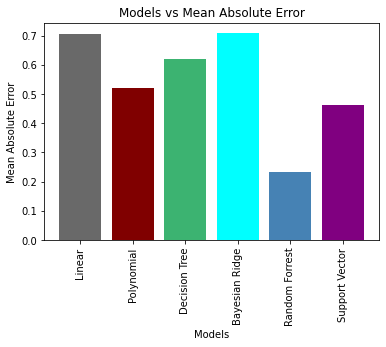

In [182]:
x1 = np.array(["Linear", "Polynomial", "Decision Tree",
                               "Bayesian Ridge", "Random Forrest", "Support Vector"]) 
y1 = np.array([mae_l, mae_p, mae_d, mae_b, mae_r, mae_s])
x_pos = np.arange(len(x1))
plt.bar(x1, y1,color=['dimgrey', 'maroon', 'mediumseagreen', 'cyan', 'steelblue','purple'])
plt.xticks(x_pos, x1, rotation=90)
plt.xlabel("Models") #Y_train at x label
plt.ylabel("Mean Absolute Error") #predictedcalue at y label
plt.title("Models vs Mean Absolute Error")
plt.show()

Models vs Mean Squared Error

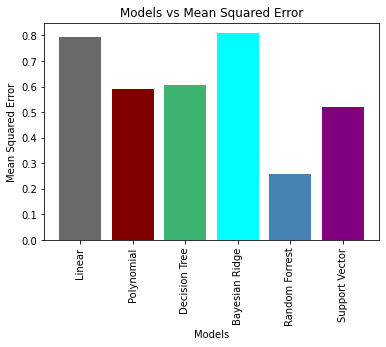

In [183]:
x1 = np.array(["Linear", "Polynomial", "Decision Tree",
                               "Bayesian Ridge", "Random Forrest", "Support Vector"]) 
y1 = np.array([mse_l, mse_p, mse_d, mse_b, mse_r, mse_s])
x_pos = np.arange(len(x1))
plt.bar(x1, y1,color=['dimgrey', 'maroon', 'mediumseagreen', 'cyan', 'steelblue','purple'])
plt.xticks(x_pos, x1, rotation=90)
plt.xlabel("Models") 
plt.ylabel("Mean Squared Error") 
plt.title("Models vs Mean Squared Error")
plt.show()

Models vs Root Mean Squared Error

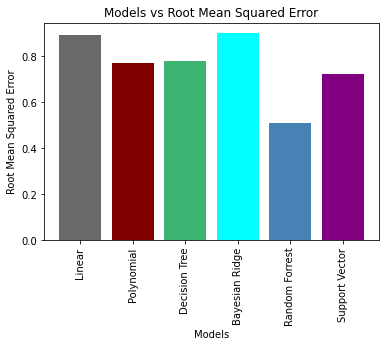

In [184]:
x1 = np.array(["Linear", "Polynomial", "Decision Tree",
                               "Bayesian Ridge", "Random Forrest", "Support Vector"]) 
y1 = np.array([rmse_l, rmse_p, rmse_d, rmse_b, rmse_r, rmse_s])
x_pos = np.arange(len(x1))
plt.bar(x1, y1,color=['dimgrey', 'maroon', 'mediumseagreen', 'cyan', 'steelblue','purple'])
plt.xticks(x_pos, x1, rotation=90)
plt.xlabel("Models") #Y_train at x label
plt.ylabel("Root Mean Squared Error") #predictedcalue at y label
plt.title("Models vs Root Mean Squared Error")
plt.show()

Models vs R Squared Error

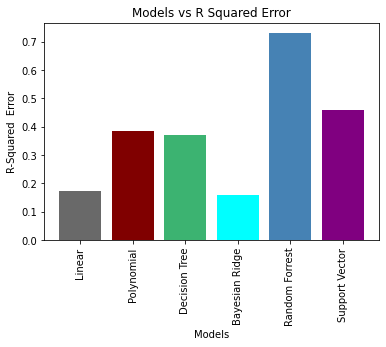

In [185]:
x1 = np.array(["Linear", "Polynomial", "Decision Tree",
                               "Bayesian Ridge", "Random Forrest", "Support Vector"]) 
y1 = np.array([rsquare_l, rsquare_p, rsquare_d, rsquare_b, rsquare_r, rsquare_s])
x_pos = np.arange(len(x1))
plt.bar(x1, y1,color=['dimgrey', 'maroon', 'mediumseagreen', 'cyan', 'steelblue','purple'])
plt.xticks(x_pos, x1, rotation=90)
plt.xlabel("Models") #Y_train at x label
plt.ylabel("R-Squared  Error") #predictedcalue at y label
plt.title("Models vs R Squared Error")
plt.show()